<a href="https://colab.research.google.com/github/juandesages/PDI.Entregas/blob/main/TP2/TP2_Desages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP2)
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.
Observaciones: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.


Primera Parte

Tareas a realizar:

1- cargar imagen en RGB, normalizarla, mostrar imagen

2- pasar RGB a YIQ

3- modificar parámetros Y por un lado IQ por otro

4 mostrar imagen original vs modificada

In [1]:
import imageio
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import my_funcitions as mf

In [2]:

#Cargar imagen
def load_image(filename):
    im_in=np.clip(imageio.imread(filename),0,255).astype(np.float)/255. 
    #imagen normalizada
    im=np.zeros((*im_in.shape[:2],3))
    image_type = 'RGB'
    if len(im_in.shape)==2: # la imagen es de tipo grayscale
        for i in range (3):
            im[:,:,i]=im_in
            image_type = 'grayscale'
    elif (im_in.shape[2]==4):
        im=im_in[:,:,:3]
        image_type = 'RGBA'
    elif im_in.shape==im.shape:
        im=im_in
    return im, image_type

#obtener información de la imagen
def get_data(im, im_type):
  if im_type == 'grayscale':
    h,w, ch = im.shape
    ch = 1
  else:
    h,w, ch = im.shape
  return h,w,ch #height, wide, channels

#guardar imagen
def save_image(im, title):
  im = im*255
  imageio.imwrite(title,im.astype(np.uint8))
  return 

#graficar imagen (mostrar imagen)
def show_image(im, title):
  plt.imshow(im)
  plt.title(title)
  plt.show()
  return 
# Para las siguientes funciones considero que la imagen es RGB, en los casos de escala de grises se "pasaron" a RGB en la funcion cargar imagen
#obtener dato de un pixel
def pixel_data(im, y, x):
  [R,G,B] = im[y,x,:]*255
  return [R,G,B]

#modificar dato de un pixel
def pixel_set(im, y, x, R,G,B):
  im[y,x,0] = R
  im[y,x,1] = G
  im[y,x,2] = B
  return

#matriz para transformar de RGB a YIQ
MAT_YIQ = np.array([[0.299, 0.595716, 0.211456],
                    [0.587, -0.274453, -0.522591],
                    [0.114, -0.321263, 0.311135]])
#funcion para pasar una imagen RGB a YIQ
def rgb2yiq(_im):
    _yiq = np.matmul(_im.reshape((-1,3)), MAT_YIQ).reshape(_im.shape)
    return _yiq
#funcion para modificar valores de Y y de IQ
def scale_yiq(_yiq, alpha, beta):
    _yiq[:, :, 0] *= alpha
    _yiq[:, :, 1:3] *= beta   
    return _yiq
#funcion para pasar la imagen de YIQ a RGB
def yiq2rgb(_yiq):
    _rgb = np.matmul(_yiq.reshape((-1,3)),np.linalg.inv(MAT_YIQ)).reshape(_yiq.shape)
    return _rgb

Imageio: 'wikkie.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/wikkie.png (461 kB)
Downloading: 8192/472047 bytes (1.7%)472047/472047 bytes (100.0%)
  Done
File saved as /root/.imageio/images/wikkie.png.


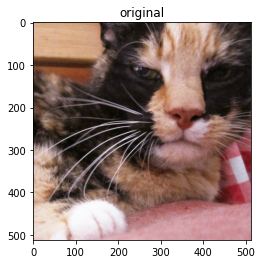

In [4]:
#@title _Cargar imagen_ seleccione la imagen que desea analizar

imagen = 'imageio:wikkie.png' #@param ['imageio:astronaut.png','imageio:camera.png','imageio:checkerboard.png', 'imageio:chelsea.png', 'imageio:coffee.png','imageio:wikkie.png']

im_RGB,im_type = load_image(imagen)

show_image(im_RGB,'original')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


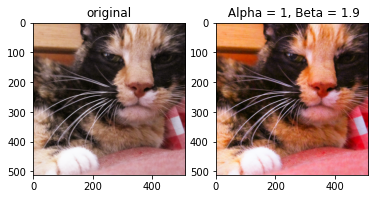

<Figure size 432x288 with 0 Axes>

In [9]:
alfa = 1 #@param {type:"slider", min:0, max:5, step:0.1}
beta = 1.9 #@param {type:"slider", min:0, max:10, step:0.1}
im_yiq = scale_yiq(rgb2yiq(im_RGB), alfa, beta)
im_rec = yiq2rgb(im_yiq)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im_RGB)
ax[0].set_title('original')
ax[1].imshow(im_rec)
ax[1].set_title(' Alpha = ' +str(alfa)+', Beta = '+str(beta))
plt.show()
#save_image(im_RGB, 'original.png')
#save_image(im_RGB, 'imagen modificada, Alpha = ' +str(alfa)+', Beta = '+str(beta)+'.png')
plt.savefig('Original Vs Modificada'+str(alfa)+', Beta = '+str(beta)+'.png')

Podemos observar que al variar el parámetro alfa, se modifica la luminancia de la imagen. Si alfa toma valores menores que 1, la imagen resultante se puede decir que es más oscura, mientras que si alfa es mayor que 1 la imagen se ve mas brillante.
En cambio al modificar el parámetro beta (que afecta los canales I y Q) se puede observar que si beta es menor que 1 el color se ve mas "lavado" (si beta =0, la imagen se ve directamente en escala de grises (luminancia)). Pero si beta es mayor que 1 el color se satura y si estos valores son mucho mayores que uno se pueden ver efectos indeseados en la imagen resultante (por saturacion de los canales)

Segunda Parte: La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.
Observaciones: el objetivo es ver cómo con diferentes paletas de colores se pueden apreciar ciertos detalles de una imagen, sin necesidad de modificar el contenido de la misma.

Tareas a realizar:

 1- cargar imagen 2d (grayscale), normalizarla, mostrar imagen 
 
 2- cambiar la paleta 
 
 3- mostrar imagen original (escala de grises) vs modificada (otra paleta)

Imageio: 'moon.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/moon.png (44 kB)
Downloading: 8192/45494 bytes (18.0%)45494/45494 bytes (100.0%)
  Done
File saved as /root/.imageio/images/moon.png.


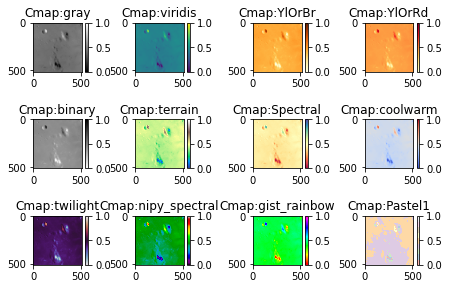

<Figure size 432x288 with 0 Axes>

In [10]:
#@title _Seleccione la imagen que desea analizar_

imagen = 'imageio:moon.png' #@param ['imageio:moon.png','imageio:camera.png','imageio:page.png','imageio:text.png']
cmap = ['gray','viridis', 'YlOrBr', 'YlOrRd','binary','terrain','Spectral', 'coolwarm','twilight', 'nipy_spectral', 'gist_rainbow','Pastel1']
im_in=np.clip(imageio.imread(imagen),0,255).astype(np.float)/255.
fil = 3
col = 4
fig, ax = plt.subplots(fil, col, constrained_layout=True)
k = 0
for i in range (fil):
  for j in range (col):
    im =ax[i,j].imshow(im_in, cmap = cmap[k])
    ax[i,j].set_title('Cmap:'+str(cmap[k]))
    divider = make_axes_locatable(ax[i,j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    k+=1
    
plt.show()
plt.savefig('colormaps.png')



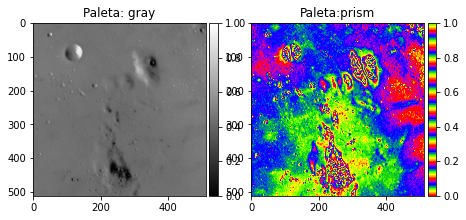

<Figure size 432x288 with 0 Axes>

In [19]:
#@title _Seleccione la imagen que desea analizar y la paleta de colores a utilizar_ 

imagen = 'imageio:moon.png' #@param ['imageio:moon.png','imageio:camera.png','imageio:page.png','imageio:text.png']
paleta = 'prism' #@param ['viridis','plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens','Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',  'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat' , 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic','twilight', 'twilight_shifted', 'hsv','Pastel1','Pastel2', 'Paired', 'Accent','Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral','gist_ncar']

im_in=np.clip(imageio.imread(imagen),0,255).astype(np.float)/255.

fig, ax = plt.subplots(1, 2, constrained_layout=True)
im= ax[0].imshow(im_in, cmap = 'gray')
ax[0].set_title('Paleta: gray')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im, cax=cax, orientation='vertical')
im= ax[1].imshow(im_in, cmap = paleta)
ax[1].set_title('Paleta:'+str(paleta))
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()
plt.savefig('Comparación Cmap: Gray Vs '+str(paleta)+'.png')

Las diferentes paletas de colores (cmap) se pueden usar según la información que se desea mostrar (resaltando ciertos valores o efectos en la imagen). Según la documentación de la librería Matplotlib existes 4 categorías principales de paletas de colores:




**Secuencial:**  cambios en la luminancia y en la saturación de color en un unico tono de manera incremental. Se usan generalmente cuando se desa representar información que tiene un cierto orden

```
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
```
            


**Divergente:** cambios en la luminancia y saturacion de 2 colores diferentes que convergen en el medio en un color insaturado. Suele usarse cuando la información a graficar tiene un valor medio crítico, como por ejemplo en topografía o cuando los datos presentan una desviación en torno a cero.
```
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
```


**Cíclicas:** cambios en la luminocidad de 2 colores que se encuentran en el medio y en el inicio y final en un color insaturado. Se suele utilizar para valores que convergen en los puntos finales, como el ángulo de fase, la dirección del viento o la hora del día.
```
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
```



**Cualitativas:**  usualmente son colores variados. Se suele emplear para representar información que no tiene ningún orden ni relación entre los datos
```
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']
```
Algunos de los mapas de colores misceláneos tienen usos particulares para los que han sido creados. Por ejemplo, gist_earth, ocean y terrain parecen crearse para trazar la topografía (verde / marrón) y las profundidades del agua (azul) juntas. 
A partir de esta información podemos chequear con las imagenes del dataset el comportamiento de las paletas. Por ejemplo con la imagen page.png, si usamos paletas secuenciales podemos apreciar mejor el texto, mientras que si usamos paletas divergentes podemos apreciar mejor la curvatura de la pagina en la imagen antes que el texto (incluso en algunas el texto se pierde). Algo similar ocurre si usamos la imagen text.png, el texto en la imagen es mas visible con las paletas secuenciales, nuevamente con algunas paletas perdemos información del texto en la imagen original. Esto ocurre generalmente cuando usamos paletas divergentes o cíclicas.
Por otro lado en la imagen moon.png las paletas divergentes o también las paletas terrain y gist_earth permiten apreciar los efectos de relieve en el terreno, mientras que las otras paletas algunos de estos fenómenos quedan enmascarados o se pierden y otras en las que se puede apreciar un exceso de información (por ejemplo prism) 

